In [1]:
import pandas as pd

data_source = 'misingvalue.csv'

#data_source = 'pima-indians-diabetes.csv'

df = pd.read_csv(data_source, delimiter=";")

df

,f1,f2,f3,f4,t
0,1,0.0,1.0,1,1
1,1,1.0,NaN,1,1
2,1,NaN,0.0,1,0
3,1,NaN,0.0,1,1
4,1,1.0,1.0,0,1
5,1,NaN,0.0,1,0
6,1,NaN,0.0,1,1
7,1,1.0,1.0,0,1
8,1,NaN,0.0,1,1
9,1,1.0,1.0,0,1


In [2]:
df.isna().sum()

f1    0
f2    9
f3    2
f4    0
t     0
dtype: int64

In [3]:
df_x = df.drop("t", axis = 1)

df_y = df["t"]

print('fitur x')
print(df_x)

print('fitur y / target')
print(df_y)

new_df01 = df.fillna(0)

new_df01



fitur x
    f1   f2   f3  f4
0    1  0.0  1.0   1
1    1  1.0  NaN   1
2    1  NaN  0.0   1
3    1  NaN  0.0   1
4    1  1.0  1.0   0
5    1  NaN  0.0   1
6    1  NaN  0.0   1
7    1  1.0  1.0   0
8    1  NaN  0.0   1
9    1  1.0  1.0   0
10   1  0.0  1.0   1
11   1  1.0  NaN   1
12   1  NaN  0.0   1
13   1  NaN  0.0   1
14   1  1.0  1.0   0
15   1  NaN  0.0   1
16   1  NaN  0.0   1
fitur y / target
0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    0
16    1
Name: t, dtype: int64


,f1,f2,f3,f4,t
0,1,0.0,1.0,1,1
1,1,1.0,0.0,1,1
2,1,0.0,0.0,1,0
3,1,0.0,0.0,1,1
4,1,1.0,1.0,0,1
5,1,0.0,0.0,1,0
6,1,0.0,0.0,1,1
7,1,1.0,1.0,0,1
8,1,0.0,0.0,1,1
9,1,1.0,1.0,0,1


In [4]:
new_df01.isna().sum()

f1    0
f2    0
f3    0
f4    0
t     0
dtype: int64

In [5]:
new_df01["t"].value_counts()

t
1    13
0     4
Name: count, dtype: int64

In [6]:
# import library
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.preprocessing import LabelBinarizer

#smote = SMOTE(k_neighbors=2)

smote = RandomOverSampler(sampling_strategy="auto")

x_binary = LabelBinarizer()

x = x_binary.fit_transform(new_df01)

x = pd.DataFrame(x, columns=['f1','f2','f3','f4','t'])

print(x)





    f1  f2  f3  f4  t
0    1   0   1   1  1
1    1   1   0   1  1
2    1   0   0   1  0
3    1   0   0   1  1
4    1   1   1   0  1
5    1   0   0   1  0
6    1   0   0   1  1
7    1   1   1   0  1
8    1   0   0   1  1
9    1   1   1   0  1
10   1   0   1   1  1
11   1   1   0   1  1
12   1   0   0   1  0
13   1   0   0   1  1
14   1   1   1   0  1
15   1   0   0   1  0
16   1   0   0   1  1


In [7]:
x_source = x.drop(["t"],axis=1)

print(x_source)



    f1  f2  f3  f4
0    1   0   1   1
1    1   1   0   1
2    1   0   0   1
3    1   0   0   1
4    1   1   1   0
5    1   0   0   1
6    1   0   0   1
7    1   1   1   0
8    1   0   0   1
9    1   1   1   0
10   1   0   1   1
11   1   1   0   1
12   1   0   0   1
13   1   0   0   1
14   1   1   1   0
15   1   0   0   1
16   1   0   0   1


In [8]:
y = x['t']

print(y)

print(y.shape)



0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    0
16    1
Name: t, dtype: int32
(17,)


In [9]:
# fit predictor and target variable

x_smote, y_smote = smote.fit_resample(x, y)

print(x_smote)


    f1  f2  f3  f4  t
0    1   0   1   1  1
1    1   1   0   1  1
2    1   0   0   1  0
3    1   0   0   1  1
4    1   1   1   0  1
5    1   0   0   1  0
6    1   0   0   1  1
7    1   1   1   0  1
8    1   0   0   1  1
9    1   1   1   0  1
10   1   0   1   1  1
11   1   1   0   1  1
12   1   0   0   1  0
13   1   0   0   1  1
14   1   1   1   0  1
15   1   0   0   1  0
16   1   0   0   1  1
17   1   0   0   1  0
18   1   0   0   1  0
19   1   0   0   1  0
20   1   0   0   1  0
21   1   0   0   1  0
22   1   0   0   1  0
23   1   0   0   1  0
24   1   0   0   1  0
25   1   0   0   1  0


In [10]:
x_smote["t"].value_counts()

t
1    13
0    13
Name: count, dtype: int64

In [11]:
print(x_smote)

print(y_smote)

    f1  f2  f3  f4  t
0    1   0   1   1  1
1    1   1   0   1  1
2    1   0   0   1  0
3    1   0   0   1  1
4    1   1   1   0  1
5    1   0   0   1  0
6    1   0   0   1  1
7    1   1   1   0  1
8    1   0   0   1  1
9    1   1   1   0  1
10   1   0   1   1  1
11   1   1   0   1  1
12   1   0   0   1  0
13   1   0   0   1  1
14   1   1   1   0  1
15   1   0   0   1  0
16   1   0   0   1  1
17   1   0   0   1  0
18   1   0   0   1  0
19   1   0   0   1  0
20   1   0   0   1  0
21   1   0   0   1  0
22   1   0   0   1  0
23   1   0   0   1  0
24   1   0   0   1  0
25   1   0   0   1  0
0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
Name: t, dtype: int32


c:\Users\FITYAN\OneDrive\Documents\UNIKOM JAYA\SEMESTER 6\Data Mining\folder\bankfull\my_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


(11,)
  Classifier                                         prediction  accuracy
0         NB                                    MultinomialNB()       1.0
1       K-NN                KNeighborsClassifier(n_neighbors=3)       1.0
2         RF  (DecisionTreeClassifier(max_depth=3, max_featu...       1.0
3         DT                           DecisionTreeClassifier()       1.0
4        MLP                        MLPClassifier(max_iter=100)       1.0
5        SVM  SVC(decision_function_shape='ovo', kernel='lin...       1.0


C:\Users\FITYAN\AppData\Local\Temp\ipykernel_24076\1734454220.py:60: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Classifier', y='accuracy', data=cv_df,


accuracy
1.0    1.0
Name: accuracy, dtype: float64


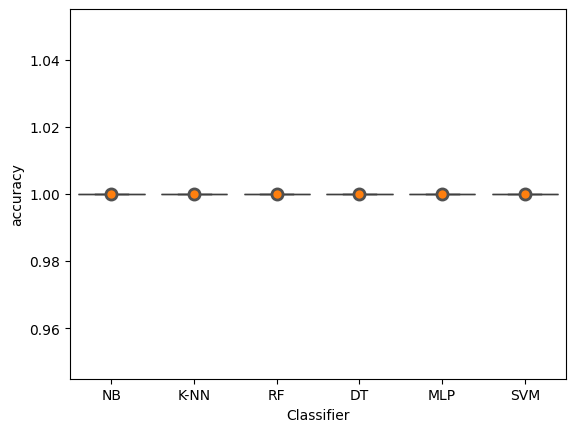

In [12]:
import pandas as pd    
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

x_smote.shape
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.4, random_state = 1)

NaiveBayes = MultinomialNB().fit(X_train,np.ravel(y_train,order='C'))
Knn       = KNeighborsClassifier(n_neighbors = 3).fit(X_train,np.ravel(y_train,order='C'))
RandomForest = RandomForestClassifier(n_estimators=50, max_depth=3).fit(X_train,np.ravel(y_train,order='C'))
DTree =    DecisionTreeClassifier().fit(X_train,np.ravel(y_train,order='C'))
MultiLP =   MLPClassifier(max_iter= 100).fit(X_train,np.ravel(y_train,order='C'))
SuppVM =  SVC(gamma='scale', decision_function_shape='ovo', kernel = 'linear').fit(X_train,np.ravel(y_train,order='C'))

models = [
    NaiveBayes,
    Knn,      
    RandomForest, 
    DTree, 
    MultiLP, 
    SuppVM, 
] 
dlist = [
    'NB',
    'K-NN',
    'RF', 
    'DT', 
    'MLP', 
    'SVM', 
]

i = 0
print(y_test.shape)
entries = []
for model in models:
  prediction = model.predict(X_test)
  accuracies = accuracy_score(y_test, prediction)
  nameS = dlist[i]
  entries.append((nameS, model, accuracies))
  i = i + 1

cv_df = pd.DataFrame(entries, columns=['Classifier','prediction','accuracy'])
cv_df.to_csv('akurasi.csv')
print(cv_df)


sns.boxplot(x='Classifier', y='accuracy', data=cv_df)
sns.stripplot(x='Classifier', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

print(cv_df.groupby('accuracy').accuracy.mean())
plt.show()